In [1]:
from sklearn.metrics import accuracy_score
#classification
from sklearn.neighbors import KNeighborsClassifier #k-plus proches voisins
from sklearn_extra.cluster import KMedoids


#Partitionnement
from sklearn.cluster import AgglomerativeClustering #Regroupement hiérarchique (Partitionnement binaire)
from pyclustering.cluster.kmedoids import kmedoids

#réduction de dimensionnalité
from sklearn.decomposition import KernelPCA #ce n'est pas PCoA mais on peut l'utiliser pour que le résultat soit le même
from sklearn.manifold import Isomap

ModuleNotFoundError: No module named 'sklearn_extra'

Pour commencer le projet, nous allons créer une baseline pour MNIST en faisant la distance euclidienne pour tous les algorithmes que le projet nous indique. Donc nous le ferons pour:
● k-medoïde
● Partition binaire (Regroupement hiérarchique)
● PCoA (c'est un cas particulier de MDS)
● Isomap
● KNN (k-plus proches voisins)

Nous allons aussi importer MNIST et ADULT

In [ ]:
# https://notebook.community/francesco-mannella/neunet-basics/course/mnist
# import the mnist class
from mnist import MNIST

# init with the 'data' dir
mndata = MNIST('.\data')

# Load data
mndata.load_training()
mndata.load_testing()

# The number of pixels per side of all images
img_side = 28

# Each input is a raw vector.
# The number of units of the network
# corresponds to the number of input elements
n_mnist_pixels = img_side*img_side

Ici on vérifie que le dataset à bien téléchargé.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
from matplotlib import cm

In [ ]:
%matplotlib inline
from pylab import *

# Define the number of samples to take
num_samples = 10

# create a figure where we will store all samples
plt.figure(figsize=(10,1))

# Iterate over samples indices
for sample in range(num_samples) :

    # The image corresponding to the 'sample' index
    img = mndata.train_images[sample]

    # The label of the image
    label = mndata.train_labels[sample]

    # The image is stored as a rolled vector,
    # we have to roll it back in a matrix
    aimg = np.array(img).reshape(img_side, img_side)

    # Open a subplot for each sample
    plt.subplot(1, num_samples, sample+1)

    # The corresponding digit is the title of the plot
    plt.title(label)

    # We use imshow to plot the matrix of pixels
    plt.imshow(aimg, interpolation = 'none',
        aspect = 'auto', cmap = cm.binary)
    plt.axis("off")

plt.show()

In [11]:
import numpy as np

In [12]:
from matplotlib import cm

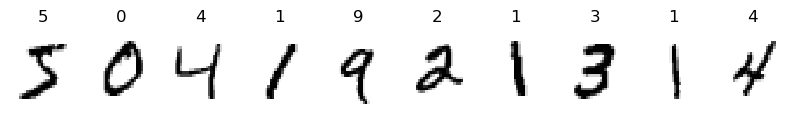

In [13]:
%matplotlib inline
from pylab import *

# Define the number of samples to take
num_samples = 10

# create a figure where we will store all samples
plt.figure(figsize=(10,1))

# Iterate over samples indices
for sample in range(num_samples) :

    # The image corresponding to the 'sample' index
    img = mndata.train_images[sample]

    # The label of the image
    label = mndata.train_labels[sample]

    # The image is stored as a rolled vector,
    # we have to roll it back in a matrix
    aimg = np.array(img).reshape(img_side, img_side)

    # Open a subplot for each sample
    plt.subplot(1, num_samples, sample+1)

    # The corresponding digit is the title of the plot
    plt.title(label)

    # We use imshow to plot the matrix of pixels
    plt.imshow(aimg, interpolation = 'none',
        aspect = 'auto', cmap = cm.binary)
    plt.axis("off")

plt.show()

Ici nous ferons l'algorithme de k-medoïde avec la distance euclidienne pour MNIST

In [ ]:
# # https://medium.com/@ali.soleymani.co/beyond-scikit-learn-is-it-time-to-retire-k-means-and-use-this-method-instead-b8eb9ca9079a
# kmedo = KMedoids(n_clusters = 9, random_state=1)
# kmedo.fit(mndata.train_images, mndata.train_labels)
# # Doing predictions on the test set
# y_hat = kmedo.predict(mndata.test_images)
# acc = accuracy_score(mndata.test_labels, y_hat)
# print(acc)

In [ ]:
from pyclustering.utils import distance_metric, type_metric
from pyclustering.cluster import cluster_visualizer

initial_medoids = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# create Minkowski distance metric with degree equals to '2'
metric = distance_metric(type_metric.MINKOWSKI, degree=2)
# create K-Medoids algorithm with specific distance metric
medo = kmedoids(mndata.train_images, initial_medoids, metric=metric)

# https://pyclustering.github.io/docs/0.9.0/html/d0/dd3/classpyclustering_1_1cluster_1_1kmedoids_1_1kmedoids.html

# Run cluster analysis and obtain results.
medo.process()
clusters = medo.get_clusters()
# Show allocated clusters.
print(clusters)
# Display clusters.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.show()

Ici nous ferons la partition binaire avec la distance euclidienne pour MNIST

In [ ]:
agglo = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
agglo.fit()